# Q1

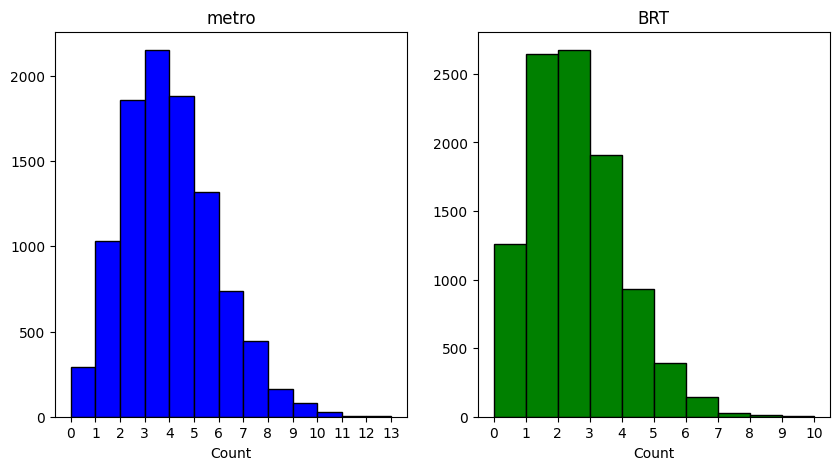

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Tarbiat.csv')

metro = df['metro']
BRT = df['BRT']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(metro, bins=metro.max()-metro.min(), color='blue', edgecolor='black')
plt.title('metro')
plt.xlabel('Count')
plt.xticks(range(int(metro.min()), int(metro.max()) + 1))

plt.subplot(1, 2, 2)
plt.hist(BRT, bins=BRT.max()-BRT.min(), color='green', edgecolor='black')
plt.title('BRT')
plt.xlabel('Count')
plt.xticks(range(int(BRT.min()), int(BRT.max()) + 1))

plt.show()


In [102]:
import numpy as np

metroAverage = np.mean(metro)
BRT_Average = np.mean(BRT)

print(metroAverage)
print(BRT_Average)

3.5316
2.0636


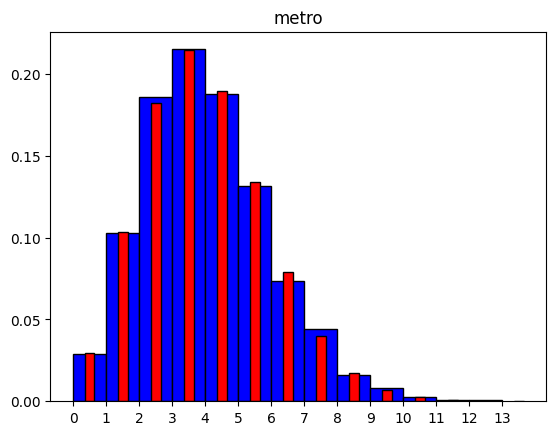

In [103]:
from scipy.stats import poisson

x = np.arange(int(metro.min()), int(metro.max()) + 1)

plt.hist(metro, bins=metro.max()-metro.min(), color='blue', edgecolor='black' , density=True)
plt.bar(x+0.5, poisson.pmf(x, metroAverage), color='red', edgecolor='black', width= 0.3)
plt.xticks(x)

plt.title('metro')

plt.show()

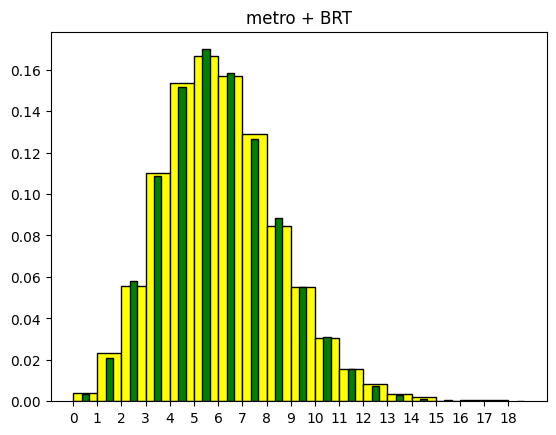

In [104]:
x = np.arange(int((metro+BRT).min()), int((metro+BRT).max()) + 1)

plt.hist(metro+BRT, bins=(metro+BRT).max()-(metro+BRT).min(), color='yellow', edgecolor='black' , density=True)
plt.bar(x+0.5, poisson.pmf(x, metroAverage + BRT_Average), color='green', edgecolor='black', width= 0.3)
plt.xticks(x)

plt.title('metro + BRT')

plt.show()

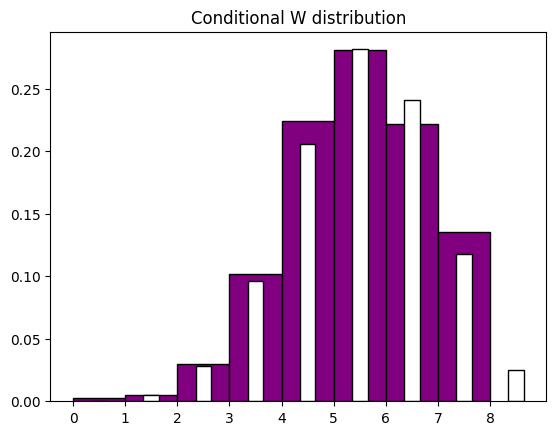

In [107]:
from scipy.special import comb

n = 8
x = np.linspace(0,n,n+1)

def newDistrbFunc(n,k):
  return (comb(n, k) * (metroAverage ** k) * (BRT_Average ** (n-k)))

def wDisturb(w,n):
  base = 0
  for i in range(0,n+1,1):
    base += newDistrbFunc(n,i)
  return (newDistrbFunc(n,w)/base)


condition_result = df['metro'] + df['BRT'] == n

result_list = df.loc[condition_result, 'metro']

plt.hist(result_list, bins=(result_list).max()-(result_list).min(), color='purple', edgecolor='black' , density=True)
plt.bar(x+0.5, wDisturb(x, n), color='white', edgecolor='black', width= 0.3)
plt.xticks(x)
plt.title('Conditional W distribution')

plt.show()


# Q2

In [108]:
import random

def montoCarlo(n,k) :
  answers = list()
  for i in range(0,k,1):
    setOfCoupons = set() ;
    times = 0 ;

    while (len(setOfCoupons) != n):
      res = random.randint(1, n)
      setOfCoupons.add(res)
      times += 1
    answers.append(times)
  return np.mean(answers)


print(montoCarlo(10,10))
print(montoCarlo(10,100))
print(montoCarlo(10,1000))

32.2
30.84
29.354


In [109]:
from sympy import symbols, summation , diff
from math import exp

x = symbols('x')
s = symbols('s')
e = exp(1)

torque = 1
n=10

for i in range(1,n+1,1):
  expression = (e**(s*x)) * (((i-1)/n)**(x-1)) * ((n-i+1)/n)
  torque *= summation(expression, (x, 1, 200))


res = diff(torque, s).subs({s:0})
print(res)

29.2896823779169


# Q3

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digits.csv')

def process_row(row):
    row[1:] = (row[1:] >= 128).astype(int)
    return row

df = df.apply(process_row, axis=1)

row201 = df.loc[200].copy()
row202 = df.loc[201].copy()
df = df.drop([200, 201])

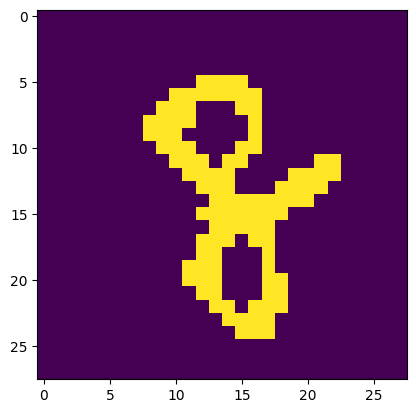

In [111]:
plt.imshow(np.reshape(df.loc[65].values[1:], (28, 28)))
plt.show()


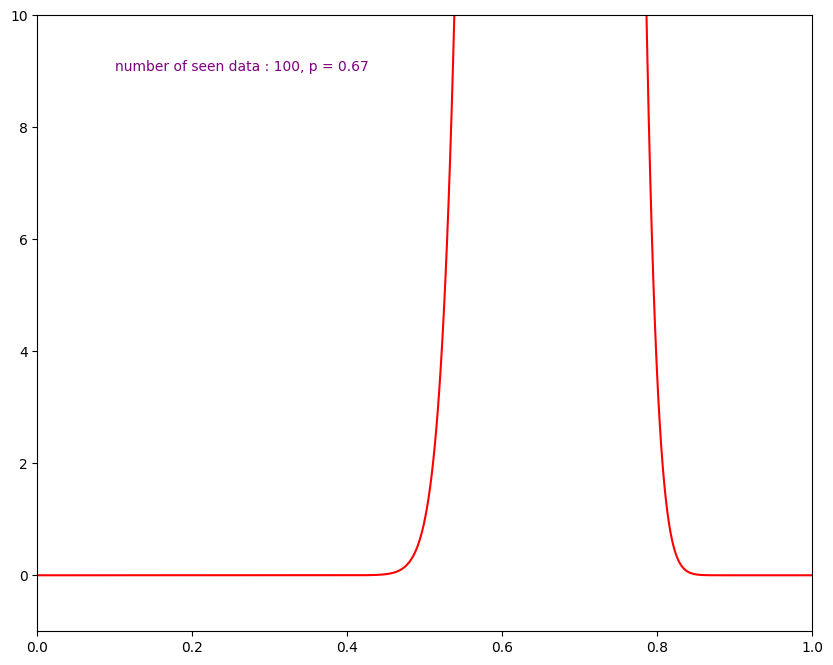

<Figure size 1000x800 with 0 Axes>

In [113]:
from scipy import integrate, stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    pny = 1 - p
    if n:
      pny = p

    integrand = lambda x: stats.beta.pdf(x, a=1, b=1) * (1 - x)
    integral, error = integrate.quad(integrand, 0, 1)


    post = (pny * fy)/(integral)
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

In [114]:
PXlabel8 = df[df['label'] == 8].iloc[:, 1:].mean(axis=0)
PXlabel9 = df[df['label'] == 9].iloc[:, 1:].mean(axis=0)

def pXlable(X, choosedLabel):
  ans = 1
  for i in range(0,784,1):
    ans *= (choosedLabel.iloc[i] ** X.iloc[i+1] ) * ((1 - choosedLabel.iloc[i]) ** (1 - X.iloc[i+1]))
  return ans

def pLableX(choosedLable, X):
  return (pXlable(X, choosedLable)) / (pXlable(X,PXlabel8) + pXlable(X,PXlabel9))

print(f'P(lable=8, X=201)= {pLableX(PXlabel8, row201)}')
print(f'P(lable=8, X=202)= {pLableX(PXlabel8, row202)}')
print(f'P(lable=9, X=201)= {pLableX(PXlabel9, row201)}')
print(f'P(lable=9, X=202)= {pLableX(PXlabel9, row202)}')

P(lable=8, X=201)= 0.9997406457898158
P(lable=8, X=202)= 5.915116612170155e-19
P(lable=9, X=201)= 0.00025935421018423725
P(lable=9, X=202)= 1.0
